# **Kth Nearest Neighbor**

## *Data Import*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

## *About Data*

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.head().style.background_gradient(cmap= "viridis")

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
df.duplicated().sum()

0

## *Visualization*

<Axes: >

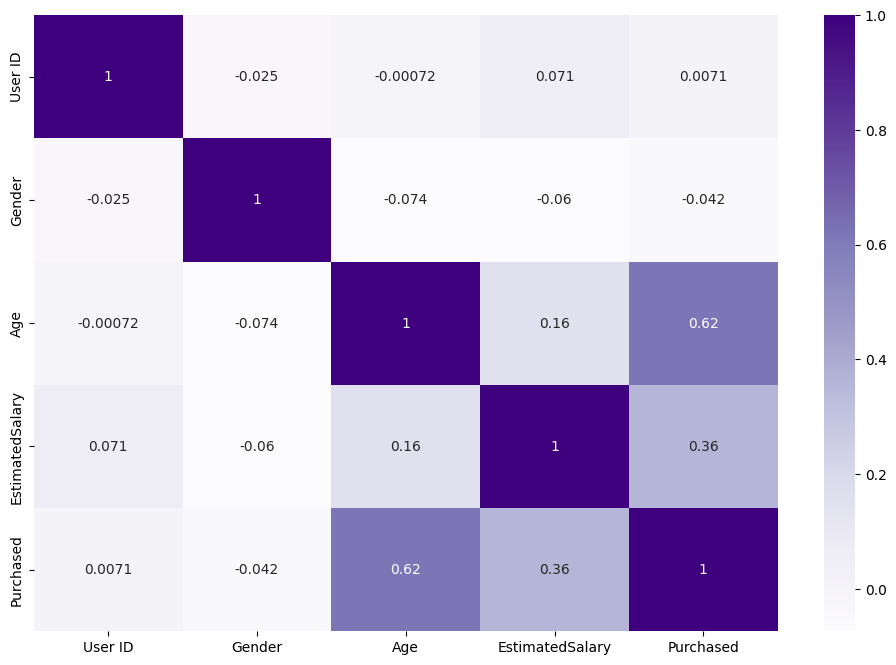

In [17]:
map_gender = {
    "Male" : 1,
    "Female" : 0
}

df["Gender"] = df["Gender"].map(map_gender)

plt.figure(figsize= (12, 8))
sns.heatmap(df.corr(), annot= True, cmap= "Purples")

<Axes: xlabel='Purchased', ylabel='count'>

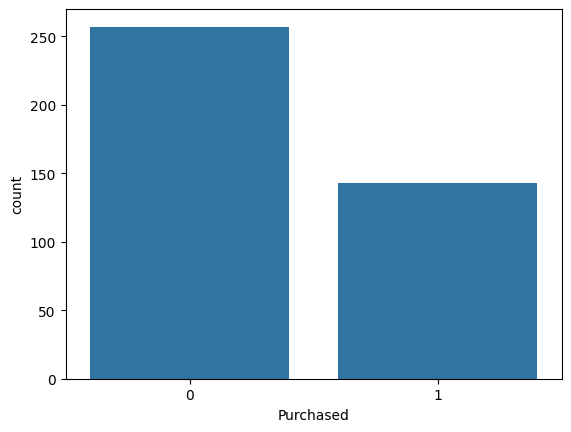

In [18]:
sns.countplot(x= "Purchased", data= df)

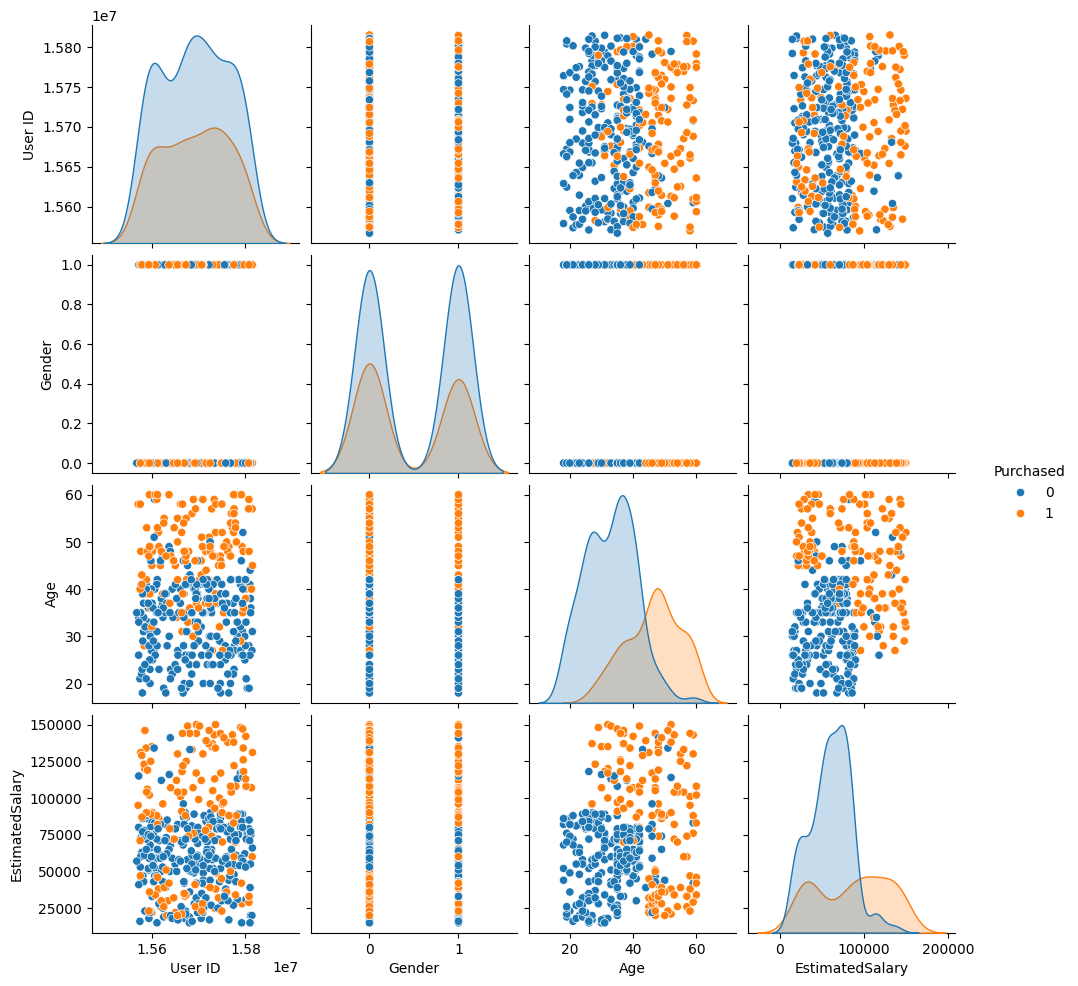

In [19]:
sns.pairplot(df, hue= "Purchased")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

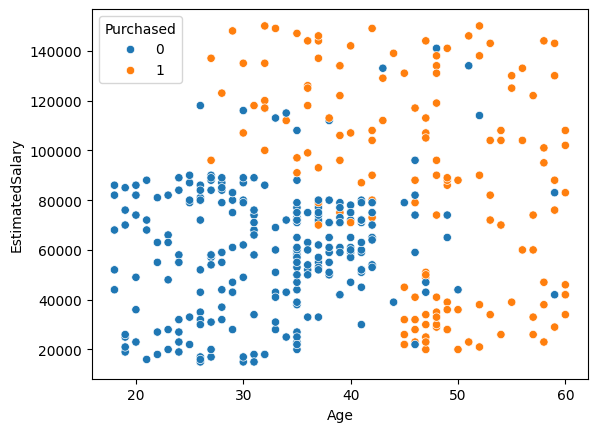

In [42]:
sns.scatterplot(data= df, x= "Age", y= "EstimatedSalary", hue= "Purchased")

## *Train Test Split*

In [20]:
X = df.drop("Purchased", axis= 1)
y = df["Purchased"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 9)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [44]:
prediction = knn.predict(scaled_X_test)

## *Performance*

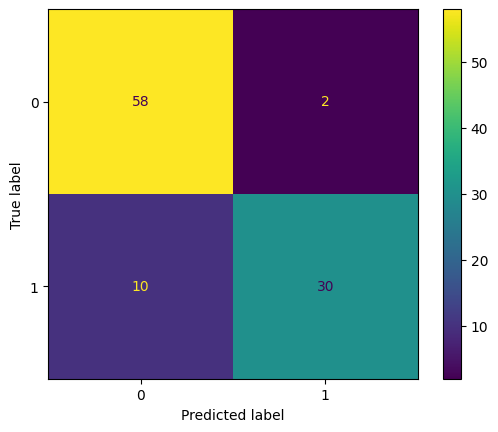

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)

In [46]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        60
           1       0.94      0.75      0.83        40

    accuracy                           0.88       100
   macro avg       0.90      0.86      0.87       100
weighted avg       0.89      0.88      0.88       100



In [47]:
error_rate = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(scaled_X_train, y_train)
    pred_elbow = knn.predict(scaled_X_test)

    error = 1 - accuracy_score(y_test, pred_elbow)
    error_rate.append(error)

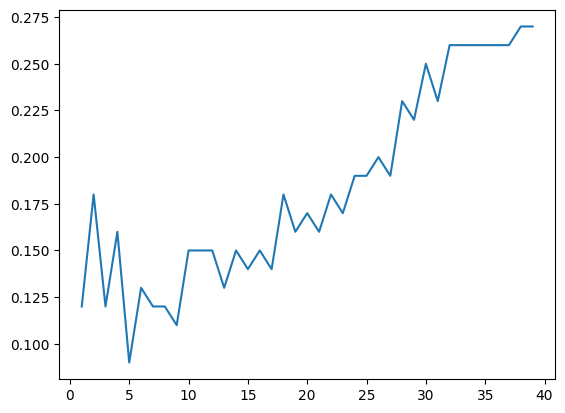

In [48]:
plt.plot(range(1, 40), error_rate)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        60
           1       0.94      0.82      0.88        40

    accuracy                           0.91       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



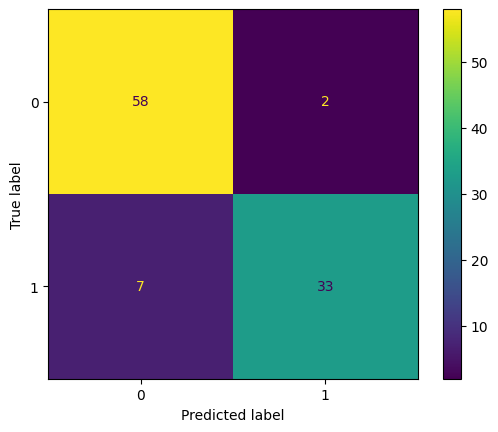

In [49]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(scaled_X_train, y_train)

prediction = knn.predict(scaled_X_test)

ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)
print(classification_report(y_test, prediction))